# Яндекс.Музыка

Сравнение Москвы и Петербурга окружено мифами. Например:
 * Москва — мегаполис, подчинённый жёсткому ритму рабочей недели;
 * Петербург — культурная столица, со своими вкусами.

На данных Яндекс.Музыки вы сравните поведение пользователей двух столиц.

**Цель исследования** — проверьте три гипотезы:
1. Активность пользователей зависит от дня недели. Причём в Москве и Петербурге это проявляется по-разному.
2. В понедельник утром в Москве преобладают одни жанры, а в Петербурге — другие. Так же и вечером пятницы преобладают разные жанры — в зависимости от города. 
3. Москва и Петербург предпочитают разные жанры музыки. В Москве чаще слушают поп-музыку, в Петербурге — русский рэп.

**Ход исследования**

Данные о поведении пользователей вы получите из файла `yandex_music_project.csv`. О качестве данных ничего не известно. Поэтому перед проверкой гипотез понадобится обзор данных. 

Вы проверите данные на ошибки и оцените их влияние на исследование. Затем, на этапе предобработки вы поищете возможность исправить самые критичные ошибки данных.
 
Таким образом, исследование пройдёт в три этапа:
 1. Обзор данных.
 2. Предобработка данных.
 3. Проверка гипотез.



## Обзор данных

Составим первое представление о данных Яндекс.Музыки.




In [1]:
import pandas as pd  # импорт библиотек
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
try:
    df = pd.read_csv('yandex_music_project.csv')
except:
    df = pd.read_csv('/datasets/yandex_music_project.csv') # чтение файла с данными и сохранение в df

In [3]:
df.head(10) # получение первых 10 строк 

,userID,Track,artist,genre,City,time,Day
0,FFB692EC,Kamigata To Boots,The Mass Missile,rock,Saint-Petersburg,20:28:33,Wednesday
1,55204538,Delayed Because of Accident,Andreas Rönnberg,rock,Moscow,14:07:09,Friday
2,20EC38,Funiculì funiculà,Mario Lanza,pop,Saint-Petersburg,20:58:07,Wednesday
3,A3DD03C9,Dragons in the Sunset,Fire + Ice,folk,Saint-Petersburg,08:37:09,Monday
4,E2DC1FAE,Soul People,Space Echo,dance,Moscow,08:34:34,Monday
5,842029A1,Преданная,IMPERVTOR,rusrap,Saint-Petersburg,13:09:41,Friday
6,4CB90AA5,True,Roman Messer,dance,Moscow,13:00:07,Wednesday
7,F03E1C1F,Feeling This Way,Polina Griffith,dance,Moscow,20:47:49,Wednesday
8,8FA1D3BE,И вновь продолжается бой,NaN,ruspop,Moscow,09:17:40,Friday
9,E772D5C0,Pessimist,NaN,dance,Saint-Petersburg,21:20:49,Wednesday


In [4]:
df.info() # получение общей информации о данных в таблице df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65079 entries, 0 to 65078
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0     userID  65079 non-null  object
 1   Track     63848 non-null  object
 2   artist    57876 non-null  object
 3   genre     63881 non-null  object
 4     City    65079 non-null  object
 5   time      65079 non-null  object
 6   Day       65079 non-null  object
dtypes: object(7)
memory usage: 3.5+ MB


Итак, в таблице семь столбцов. Тип данных во всех столбцах — `object`.

Согласно документации к данным:
* `userID` — идентификатор пользователя;
* `Track` — название трека;  
* `artist` — имя исполнителя;
* `genre` — название жанра;
* `City` — город пользователя;
* `time` — время начала прослушивания;
* `Day` — день недели.

В названиях колонок видны три нарушения стиля:
1. Строчные буквы сочетаются с прописными.
2. Встречаются пробелы.
3. В названии колонки userID должен использоваться "змеиный регистр" = user_id


Количество значений в столбцах различается. Значит, в данных есть пропущенные значения.


**Выводы**

В каждой строке таблицы — данные о прослушанном треке. Часть колонок описывает саму композицию: название, исполнителя и жанр. Остальные данные рассказывают о пользователе: из какого он города, когда он слушал музыку. 

Предварительно можно утверждать, что, данных достаточно для проверки гипотез. Но встречаются пропуски в данных, а в названиях колонок — расхождения с хорошим стилем.

Чтобы двигаться дальше, нужно устранить проблемы в данных.

## Предобработка данных
Исправим стиль в заголовках столбцов, исключим пропуски. Затем проверим данные на дубликаты.

### Стиль заголовков

In [5]:
df.columns # перечень названий столбцов таблицы df

Index(['  userID', 'Track', 'artist', 'genre', '  City  ', 'time', 'Day'], dtype='object')

Приведем названия в соответствие с хорошим стилем:

In [6]:
df = df.rename(columns={'  userID': 'user_id', 'Track': 'track', '  City  ': 'city', 'Day': 'day'}) # переименование столбцов

In [7]:
df.columns # проверка результатов - перечень названий столбцов

Index(['user_id', 'track', 'artist', 'genre', 'city', 'time', 'day'], dtype='object')

### Пропуски значений
Посмотрим, сколько в таблице пропущенных значений.

In [8]:
df.isna().sum() # подсчёт пропусков

user_id       0
track      1231
artist     7203
genre      1198
city          0
time          0
day           0
dtype: int64

Не все пропущенные значения влияют на исследование. Так в `track` и `artist` пропуски не важны. Достаточно заменить их явными обозначениями.

Но пропуски в `genre` могут помешать сравнению музыкальных вкусов в Москве и Санкт-Петербурге. Придётся:
* заполнить и эти пропуски явными обозначениями,
* оценить, насколько они повредят расчётам. 

Заменим пропущенные значения в столбцах `track`, `artist` и `genre` на строку `'unknown'`. 

In [9]:
columns_to_replace = ['track', 'artist', 'genre'] 
for column in columns_to_replace:
    df[column] = df[column].fillna('unknown') 

Убедимся, что в таблице не осталось пропусков.

In [10]:
df.isna().sum() # подсчёт пропусков

user_id    0
track      0
artist     0
genre      0
city       0
time       0
day        0
dtype: int64

### Дубликаты
Посчитаем явные дубликаты и удалим их:

In [11]:
df.duplicated().sum() # подсчёт явных дубликатов

3826

In [12]:
df = df.drop_duplicates().reset_index(drop=True) 

In [13]:
df.duplicated().sum() # проверка на отсутствие дубликатов

0

Проверим данные на неявные дубликаты:

In [14]:
df['genre'].sort_values().unique() # Просмотр уникальных названий жанров

array(['acid', 'acoustic', 'action', 'adult', 'africa', 'afrikaans',
       'alternative', 'alternativepunk', 'ambient', 'americana',
       'animated', 'anime', 'arabesk', 'arabic', 'arena',
       'argentinetango', 'art', 'audiobook', 'author', 'avantgarde',
       'axé', 'baile', 'balkan', 'beats', 'bigroom', 'black', 'bluegrass',
       'blues', 'bollywood', 'bossa', 'brazilian', 'breakbeat', 'breaks',
       'broadway', 'cantautori', 'cantopop', 'canzone', 'caribbean',
       'caucasian', 'celtic', 'chamber', 'chanson', 'children', 'chill',
       'chinese', 'choral', 'christian', 'christmas', 'classical',
       'classicmetal', 'club', 'colombian', 'comedy', 'conjazz',
       'contemporary', 'country', 'cuban', 'dance', 'dancehall',
       'dancepop', 'dark', 'death', 'deep', 'deutschrock', 'deutschspr',
       'dirty', 'disco', 'dnb', 'documentary', 'downbeat', 'downtempo',
       'drum', 'dub', 'dubstep', 'eastern', 'easy', 'electronic',
       'electropop', 'emo', 'entehno', '

Выявили следующие неявные дубликаты *hiphop*:
* *hip*,
* *hop*,
* *hip-hop*.

Чтобы очистить от них таблицу напишем функцию `replace_wrong_genres()` с двумя параметрами: 
* `wrong_genres` — список дубликатов,
* `correct_genre` — строка с правильным значением.

Функция должна исправить колонку `genre` в таблице `df`: заменить каждое значение из списка `wrong_genres` на значение из `correct_genre`.

In [15]:
def replace_wrong_genres(wrong_genres, correct_genre): # Функция для замены неявных дубликатов
    for wrong_genre in wrong_genres:
        df['genre'] = df['genre'].replace(wrong_genre, correct_genre)

In [16]:
duplicates = ['hip', 'hop', 'hip-hop'] # Устранение неявных дубликатов
name = 'hiphop'
replace_wrong_genres(duplicates, name)

In [17]:
df['genre'].sort_values().unique() # Проверка на неявные дубликаты

array(['acid', 'acoustic', 'action', 'adult', 'africa', 'afrikaans',
       'alternative', 'alternativepunk', 'ambient', 'americana',
       'animated', 'anime', 'arabesk', 'arabic', 'arena',
       'argentinetango', 'art', 'audiobook', 'author', 'avantgarde',
       'axé', 'baile', 'balkan', 'beats', 'bigroom', 'black', 'bluegrass',
       'blues', 'bollywood', 'bossa', 'brazilian', 'breakbeat', 'breaks',
       'broadway', 'cantautori', 'cantopop', 'canzone', 'caribbean',
       'caucasian', 'celtic', 'chamber', 'chanson', 'children', 'chill',
       'chinese', 'choral', 'christian', 'christmas', 'classical',
       'classicmetal', 'club', 'colombian', 'comedy', 'conjazz',
       'contemporary', 'country', 'cuban', 'dance', 'dancehall',
       'dancepop', 'dark', 'death', 'deep', 'deutschrock', 'deutschspr',
       'dirty', 'disco', 'dnb', 'documentary', 'downbeat', 'downtempo',
       'drum', 'dub', 'dubstep', 'eastern', 'easy', 'electronic',
       'electropop', 'emo', 'entehno', '

**Выводы**

Предобработка обнаружила три проблемы в данных:

- нарушения в стиле заголовков,
- пропущенные значения,
- дубликаты — явные и неявные.

Мы исправили заголовки, чтобы упростить работу с таблицей. Без дубликатов исследование станет более точным.

Пропущенные значения заменили на `'unknown'`. Ещё предстоит увидеть, не повредят ли исследованию пропуски в колонке `genre`.

Теперь можно перейти к проверке гипотез. 

## Проверка гипотез

### Сравнение поведения пользователей двух столиц

Первая гипотеза утверждает, что пользователи по-разному слушают музыку в Москве и Санкт-Петербурге. Проверим это предположение по данным о трёх днях недели — понедельнике, среде и пятнице. Для этого:

* Разделим пользователей Москвы и Санкт-Петербурга
* Сравним, сколько треков послушала каждая группа пользователей в понедельник, среду и пятницу.


Создадим функцию number_tracks(), которая посчитает прослушивания для заданного дня и города.

In [18]:
def number_tracks(df,day, city):
    track_list = df[df['day'] == day] 
    track_list = track_list[track_list['city'] == city] 
    track_list_count = track_list['user_id'].count() 
    return track_list_count

Сразу объединим все полученные значения в таблицу

In [19]:
data = pd.DataFrame(columns =['city', 'Monday', 'Wednesday', 'Friday'])
data['city'] = df['city'].unique()
for i in data[['Monday', 'Wednesday', 'Friday']].columns:
    for city in data['city']:
        data.loc[data['city'] == city,i] = number_tracks(df,i,city)
data

,city,Monday,Wednesday,Friday
0,Saint-Petersburg,5614,7003,5895
1,Moscow,15740,11056,15945


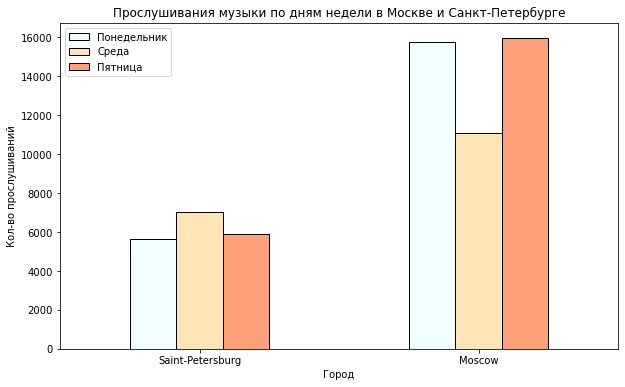

In [20]:
data.plot(kind='bar', x='city', rot=0, figsize=(10,6), color=["azure", "moccasin",  "lightsalmon"], edgecolor='black');
plt.legend(['Понедельник','Среда', 'Пятница'])
plt.title('Прослушивания музыки по дням недели в Москве и Санкт-Петербурге')
plt.xlabel('Город')
plt.ylabel('Кол-во прослушиваний');

В Москве прослушиваний больше, чем в Петербурге. Из этого не следует, что московские пользователи чаще слушают музыку. Просто самих пользователей в Москве больше.

Пользователи из Москвы менее активны в среду, в отличие от петербуржцев, чья активность в среду возрастает

**Выводы**

Данные показывают разницу поведения пользователей:

- В Москве пик прослушиваний приходится на понедельник и пятницу, а в среду заметен спад.
- В Петербурге, наоборот, больше слушают музыку по средам. Активность в понедельник и пятницу здесь почти в равной мере уступает среде.

Значит, данные говорят в пользу первой гипотезы.

### Музыка в начале и в конце недели

Согласно второй гипотезе, утром в понедельник в Москве преобладают одни жанры, а в Петербурге — другие. Так же и вечером пятницы преобладают разные жанры — в зависимости от города.

Для проверки этой гипотезы сохраним в 2 таблицы данные по Москве и Санкт-Петербургу, напишем функциию, возвращающую топ 10 жанров в интересующие нас день недели и время суток

In [21]:
moscow_general = df[df['city'] == 'Moscow']
spb_general = df[df['city'] == 'Saint-Petersburg']

In [22]:
def genre_weekday(table, day, time1, time2): 
    genre_df = table[table['day'] == day]
    genre_df = genre_df[genre_df['time'] > time1] 
    genre_df = genre_df[genre_df['time'] < time2] 

    genre_df_count = genre_df.groupby('genre') ['genre'].count() 

    genre_df_sorted = genre_df_count.sort_values(ascending=False)    

    return pd.DataFrame(genre_df_sorted).head(10)

Cравним результаты для Москвы и Санкт-Петербурга в понедельник утром (с 7:00 до 11:00) и в пятницу вечером (с 17:00 до 23:00):

In [23]:
mos_mon = genre_weekday(moscow_general, 'Monday', '07:00', '11:00')
mos_mon.columns=['count']
mos_fri = genre_weekday(moscow_general, 'Friday', '17:00', '23:00')
mos_fri.columns=['count']

mos_tab = mos_mon.merge(mos_fri,on='genre', how='outer')
mos_tab.columns=['morning_monday', 'night_friday']
mos_tab = mos_tab.reset_index()

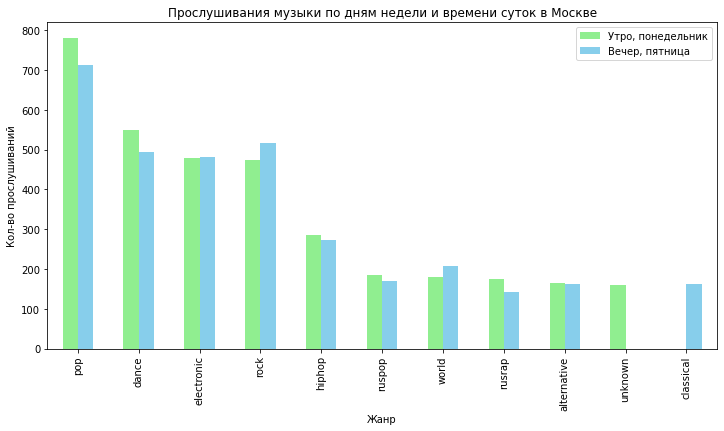

In [24]:
mos_tab.plot(kind='bar',x='genre', figsize=(12,6), color=["lightgreen", "skyblue"])
plt.legend(['Утро, понедельник','Вечер, пятница'])
plt.title('Прослушивания музыки по дням недели и времени суток в Москве')
plt.xlabel('Жанр')
plt.ylabel('Кол-во прослушиваний');

In [25]:
spb_mon = genre_weekday(spb_general, 'Monday', '07:00', '11:00') 
spb_mon.columns=['count']
spb_fri = genre_weekday(spb_general, 'Friday', '17:00', '23:00') 
spb_fri.columns=['count']

spb_tab = spb_mon.merge(spb_fri,on='genre', how='outer')
spb_tab.columns=['morning_monday', 'night_friday']
spb_tab = spb_tab.reset_index()

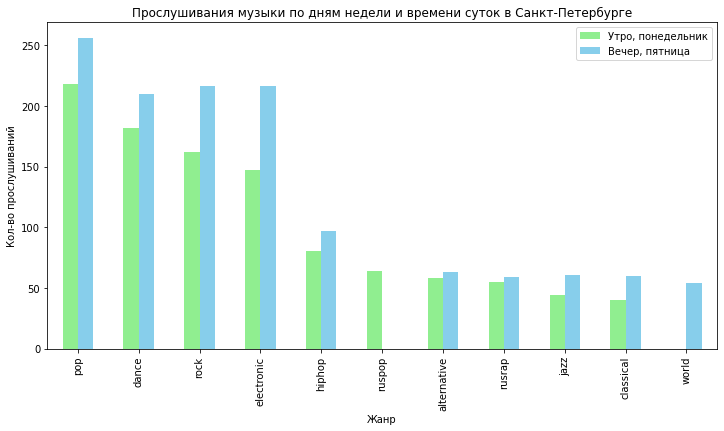

In [26]:
spb_tab.plot(kind='bar',x='genre', figsize=(12,6), color=["lightgreen", "skyblue"])
plt.legend(['Утро, понедельник','Вечер, пятница'])
plt.title('Прослушивания музыки по дням недели и времени суток в Санкт-Петербурге')
plt.xlabel('Жанр')
plt.ylabel('Кол-во прослушиваний');

**Выводы**

Если сравнить топ-10 жанров в понедельник утром, можно сделать такие выводы:

1. В Москве и Петербурге слушают похожую музыку. Единственное отличие — в московский рейтинг вошёл жанр “world”, а в петербургский — джаз и классика.

2. В Москве пропущенных значений оказалось так много, что значение `'unknown'` заняло десятое место среди самых популярных жанров. Значит, пропущенные значения занимают существенную долю в данных и угрожают достоверности исследования.

Вечер пятницы не меняет эту картину. Некоторые жанры поднимаются немного выше, другие спускаются, но в целом топ-10 остаётся тем же самым.

Таким образом, вторая гипотеза подтвердилась лишь частично:
* Пользователи слушают похожую музыку в начале недели и в конце.
* Разница между Москвой и Петербургом не слишком выражена. В Москве чаще слушают русскую популярную музыку, в Петербурге — джаз.

Однако пропуски в данных ставят под сомнение этот результат. В Москве их так много, что рейтинг топ-10 мог бы выглядеть иначе, если бы не утерянные  данные о жанрах.

### Жанровые предпочтения в Москве и Петербурге

Гипотеза: Петербург — столица рэпа, музыку этого жанра там слушают чаще, чем в Москве.  А Москва — город контрастов, в котором, тем не менее, преобладает поп-музыка.

Сгруппируем таблицы `moscow_general` и `spb_general` по жанру и посчитаем прослушивания треков каждого жанра.

In [27]:
moscow_genres = moscow_general.groupby(['genre'])['genre'].count().sort_values(ascending=False)
moscow_genres.head(10)

genre
pop            5892
dance          4435
rock           3965
electronic     3786
hiphop         2096
classical      1616
world          1432
alternative    1379
ruspop         1372
rusrap         1161
Name: genre, dtype: int64

In [28]:
spb_genres = spb_general.groupby(['genre'])['genre'].count().sort_values(ascending=False) 
spb_genres.head(10)

genre
pop            2431
dance          1932
rock           1879
electronic     1736
hiphop          960
alternative     649
classical       646
rusrap          564
ruspop          538
world           515
Name: genre, dtype: int64

**Выводы**

Гипотеза частично подтвердилась:
* Поп-музыка — самый популярный жанр в Москве, как и предполагала гипотеза. Более того, в топ-10 жанров встречается близкий жанр — русская популярная музыка.
* Вопреки ожиданиям, рэп одинаково популярен в Москве и Петербурге. 


## Итоги исследования

Мы проверили три гипотезы и установили:

1. День недели по-разному влияет на активность пользователей в Москве и Петербурге. 

Первая гипотеза полностью подтвердилась.

2. Музыкальные предпочтения не сильно меняются в течение недели — будь то Москва или Петербург. Небольшие различия заметны в начале недели, по понедельникам:
* в Москве слушают музыку жанра “world”,
* в Петербурге — джаз и классику.

Таким образом, вторая гипотеза подтвердилась лишь отчасти. Этот результат мог оказаться иным, если бы не пропуски в данных.

3. Во вкусах пользователей Москвы и Петербурга больше общего чем различий. Вопреки ожиданиям, предпочтения жанров в Петербурге напоминают московские.

Третья гипотеза не подтвердилась. Если различия в предпочтениях и существуют, на основной массе пользователей они незаметны.
